<a href="https://colab.research.google.com/github/ft-abhx/ML_Project/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

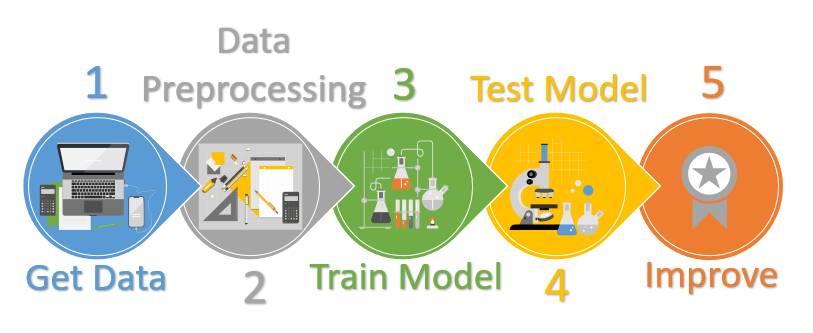

# Topics
1.   Logistic Regression (Only implementation)
2.   Confusion Matrix
1.   Performance Measures
2.   Cross Validation









#1.Logistic Regression Implementation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
#clf = LogisticRegression(solver='liblinear').fit(X, y)
clf = LogisticRegression(max_iter=100).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

#2.Removing warning by increasing number of iterations

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
#clf = LogisticRegression(solver='liblinear').fit(X, y)
clf = LogisticRegression(max_iter=150).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

0.9733333333333334

#3.How to improve the model ? or how to acheive State of Art ?

1. Increase the number of iterations
2. Try a different optimizer
3. Scale your data
4. Add engineered features
5. Data pre-processing
6. Add more data
7. Cross Validation

#4.Confusion matrix

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto',max_iter=150)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


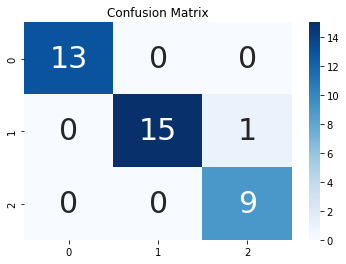

In [ ]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

#5.Performance Measures

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



What is Accuracy, precision, recall and f1-score. Explain (by writing proper equations) with example


# **Accuracy**

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction
of predictions our model got right. Formally, accuracy has the following definition

*Accuracy = Number of correct predictions/Total Number of predictions*

It is a metric that generally describes how the model performs across all classes. It is usefull when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

For binary classification, accuracy can also be calculated in terms of positives and negatives as follows :-





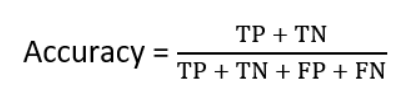

where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

For eg :- For calculating the accuracy for the cat-and-dog classification results, instead of "True" and "False", we can make it "cat" and "dog", hence calculating the accuracy as follows:-


In [ ]:
TP = 42
TN = 32
FP = 8
FN = 18
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(Accuracy)

0.74


Let's assume we have a classifier, which lways predicts "dog".

In [ ]:
TP = 0
TN = 50
FP = 50
FN = 0
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(Accuracy)

0.5


# **Precision**

The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly).

The precision measures the model's accuracy in classifying a sample as positive.

Precision is mathematically defined as follows:-

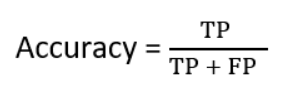

**For** example :-

In [ ]:
TP = 114
FP = 14
# FN (0) and TN (12) are not needed in the formula!
precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

precision: 0.89


# **Recall**

Recall, also known as sensitivity, is the ratio of the correctly identified positive cases to all the actual positive cases, which is the sum of the "False Negatives" and "True Positives".

The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

Recall is mathematically defined as follows:-

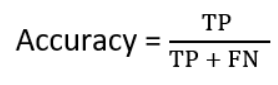

In [ ]:
TP = 114
FN = 0
# FT (14) and TN (12) are not needed in the formula!
recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

recall: 1.00


The value 1 means that no non-spam message is wrongly labeled as spam. It is important for a good spam filter that this value should be 1.

# **F1 score**

The F measure (F1 score or F score) is a measure of a test’s accuracy and is defined as the weighted harmonic mean of the precision and recall of the test.

The F score is used to measure a test’s accuracy, and it balances the use of precision and recall to do it. The F score is often used in information retrieval for measuring search, document classification, and query classification performance.

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

F1 Score is mathematically defined as follows:-

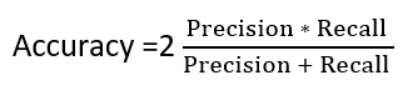

For example :-

In [ ]:
TF = 7 # we set the True false values to 5 %
print(" FN FP TP pre acc rec f1")
for FN in range(0, 7):
    for FP in range(0, FN+1):
        # The sum of FN, FP, TF and TP will be 100:
        TP = 100 - FN - FP - TF
        #print(FN, FP, TP, FN+FP+TP+TF)
        precision = TP / (TP + FP)
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        recall = TP / (TP + FN)
        f1_score = 2 * precision * recall / (precision + recall)
        print(f"{FN:6.2f}{FP:6.2f}{TP:6.2f}", end="")
        print(f"{precision:6.2f}{accuracy:6.2f}{recall:6.2f}{f1_score:6.2f}")

 FN FP TP pre acc rec f1
  0.00  0.00 93.00  1.00  1.00  1.00  1.00
  1.00  0.00 92.00  1.00  0.99  0.99  0.99
  1.00  1.00 91.00  0.99  0.99  0.99  0.99
  2.00  0.00 91.00  1.00  0.99  0.98  0.99
  2.00  1.00 90.00  0.99  0.98  0.98  0.98
  2.00  2.00 89.00  0.98  0.97  0.98  0.98
  3.00  0.00 90.00  1.00  0.98  0.97  0.98
  3.00  1.00 89.00  0.99  0.97  0.97  0.98
  3.00  2.00 88.00  0.98  0.97  0.97  0.97
  3.00  3.00 87.00  0.97  0.96  0.97  0.97
  4.00  0.00 89.00  1.00  0.97  0.96  0.98
  4.00  1.00 88.00  0.99  0.97  0.96  0.97
  4.00  2.00 87.00  0.98  0.96  0.96  0.97
  4.00  3.00 86.00  0.97  0.95  0.96  0.96
  4.00  4.00 85.00  0.96  0.94  0.96  0.96
  5.00  0.00 88.00  1.00  0.97  0.95  0.97
  5.00  1.00 87.00  0.99  0.96  0.95  0.97
  5.00  2.00 86.00  0.98  0.95  0.95  0.96
  5.00  3.00 85.00  0.97  0.94  0.94  0.96
  5.00  4.00 84.00  0.95  0.94  0.94  0.95
  5.00  5.00 83.00  0.94  0.93  0.94  0.94
  6.00  0.00 87.00  1.00  0.96  0.94  0.97
  6.00  1.00 86.00  0.99  0.9

#6.Cross Validation

Cross-validation is a statistical method of evaluating generalization performance that
is more stable and thorough than using a split into a training and a test set. In crossvalidation,
the data is instead split repeatedly and multiple models are trained. The
most commonly used version of cross-validation is **k-fold cross-validation**, where k is
a user-specified number, usually 5 or 10. When performing five-fold cross-validation,
the data is first partitioned into five parts of (approximately) equal size, called folds.
Next, a sequence of models is trained. The first model is trained using the first fold as
the test set, and the remaining folds (2–5) are used as the training set. The model is
built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then
another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.
For each of these five splits of the data into training and test sets, we compute the
accuracy. In the end, we have collected five accuracy values.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression(max_iter=150)
scores = cross_val_score(logreg, iris.data, iris.target,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Average cross-validation score: 0.97


# Reflections


1.   Improving Models
2.   Logistic Regression (is a classification)
3. Confusion Matrix
4. Performance Measures
5. Cross Validation




In [ ]:
#@title  { run: "auto", vertical-output: true }
#@title  { run: "auto", vertical-output: true }
name = "Abhijith A Thampi" #@param {type:"string"}
roll_number = "AM.EN.U4AIE20102" #@param {type:"string"}
self_assessment = 9 #@param {type:"slider", min:1, max:10, step:1}
print("Name : ",name)
print("Roll Number : ",roll_number)
print("Self Assessment Marks : ",self_assessment,"/10")